<a href="https://colab.research.google.com/github/juan-orea/03MAIR-Algoritmos-de-optimizacion/blob/master/PuntoSuperiorDerecho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random
import math
import matplotlib.pyplot as plt

In [0]:
# comprobamos que se cumple la condicion (A es esquina si está más a la derecha o más arriba que B): A_x > B_x ó que  A_y > B_y
def comprobar(A, B):
  return A[0] > B[0] or A[1] > B[1] or (A[0] == B[0] and A[1] == B[1])

def FuerzaBruta(L):
  longitud = len(L)
  resultado = []

  print('  Resolviendo por fuerza bruta: {0} puntos'.format(len(L)))
  for i in range(longitud):
    puedeSerEsquina = True
    for j in range(longitud):
      if i == j: continue
      if not comprobar(L[i], L[j]):
        puedeSerEsquina = False
        break

    if puedeSerEsquina:
      resultado.append(L[i])

  return resultado

# para calcular un punto intermedio de una lista dada: se utiliza promedia sobre un número dado de elementos
# los valores se cogen de forma aleatoria para mitigar problemas en listas ordenadas (por ejemplo)
def calcularPivote(L, N):
  largoLista = len(L)
  if largoLista == 0: return 0
  
  d = len(L[0])
  sumaParcial = (0,) * d

  for i in range(N):
      puntoAPromediar = L[random.randrange(0, largoLista)]
      sumaParcial = tuple(sumaParcial[i] + puntoAPromediar[i] for i in range(d))
  return tuple(i / N for i in sumaParcial)


# criterio de separación para elementos con más de una dimensión
# por cada dimensión, len(A), comprobamos si el valor es menor que el corte, componiendo todos mediante aritmetica booleana
def Porcion(A, B):
  return sum([ int(A[i] < B[i]) << i for i in range(len(A))])



def Divide(L):
  #Si hay pocos por Fuerza Bruta (se podría probar con distintos valores para decidir qué es "poco")
  if len(L) < 10: 
    return FuerzaBruta(L)
  
  # Dividir para listas grandes
  pivote = calcularPivote(L, 10)
  print('Corte {0}, sobre {1} puntos'.format(pivote, len(L)))
  subListas = [[] for _ in range(2 << len(L[0]))]
  for punto in L:
    subListas[Porcion(punto, pivote)].append(punto)


  for s in subListas:
    # solo por cubrirnos: comprobación de que no hayamos entrado en una condicion de bucle infinito (conjunto que no se puede trocear según nuestro criterio)
    # llegado el caso resolvemos por fuerza bruta --> estamos penalizando situaciones poco habituales, como que todos los puntos sean el mismo
    if len(s) == len(L): return FuerzaBruta(s)

  # sin tenemos cuadrante superior derecho
  # nos podemos olvidar del cuadrante inferior izquierdo (todo cubierto)
  # y los cuadrantes adyacentes se podrán considerar despues de reducirlos
  if len(subListas[0]) > 0:
    # buscamos esquinas en la parte superior derecha (este cuadrante cubre al resto)
    aristaExt = Divide(subListas[0])
    # y miramos cual es la cota superior (mayor ordenada) derecha (mayor abcisa) del resultado
    # lo que quede más arriba o más a la derecha no está cubierto
    mayorX, mayorY = -1, -1
    for i in aristaExt:
      if i[0] > mayorX: mayorX = i[0]
      if i[1] > mayorY: mayorY = i[1]

    # lista izquierda: filtramos puntos que estén por encima del mayor Y que tenemos, y calculamos sobre lo que quede
    aristaIzq = Divide([i for i in subListas[1] if i[1] > mayorY]) 
    # lista inferior: filtramos puntos que estén a la derecha del mayor X que tenemos, y calculamos sobre lo que quede
    aristaInf = Divide([i for i in subListas[2] if i[0] > mayorX])
    
    return aristaExt + aristaIzq + aristaInf
  
  # si no tenemos cuadrante superior derecho: no hace falta que le calculemos nada
  else:
    # comprobamos los cuadrante más externos que quedan: arriba-izquierda y abajo-derecha
    aristaIzq = Divide(subListas[1])
    aristaInf = Divide(subListas[2])
    # y miramos cual es la cota superior (mayor ordenada) y derecha (mayor abcisa) de los resultados
    # lo que quede más arriba Y más a la derecha no está cubierto en el cuadrante que queda
    mayorX, mayorY = -1, -1
    for i in aristaIzq:
      if i[0] > mayorX: mayorX = i[0]
    for i in aristaInf:
      if i[1] > mayorY: mayorY = i[1]
        
    # lista inferior izquierda: solo en este caso pueden ser candidatos
    # los puntos que queden arriba del punto más alto encontrado a su derecha (mayorY, de aristaInf)
    # Y a la derecha del punto más a la derecha encontrado encima (mayorX, de aristaIzq)
    aristaInt = Divide([i for i in subListas[3] if i[0] > mayorX and i[1] > mayorY])
    
    return aristaInt + aristaIzq + aristaInf

In [0]:
def Pintar(P, V, A = None):
  plt.scatter(*zip(*P))
  if A != None:
    plt.scatter(*zip(*A), c='green')
  plt.scatter(*zip(*V), c='red')
  plt.show()

  Resolviendo por fuerza bruta: 1000 puntos
Corte (41.5, 44.6), sobre 1000 puntos
Corte (68.0, 68.4), sobre 268 puntos
Corte (79.9, 78.1), sobre 62 puntos
Corte (84.6, 82.7), sobre 22 puntos
  Resolviendo por fuerza bruta: 7 puntos
  Resolviendo por fuerza bruta: 0 puntos
  Resolviendo por fuerza bruta: 0 puntos
  Resolviendo por fuerza bruta: 0 puntos
  Resolviendo por fuerza bruta: 0 puntos
  Resolviendo por fuerza bruta: 0 puntos
  Resolviendo por fuerza bruta: 0 puntos
  Resolviendo por fuerza bruta: 0 puntos
  Resolviendo por fuerza bruta: 0 puntos
[(89, 86), (88, 89)]
[(89, 86), (88, 89)]


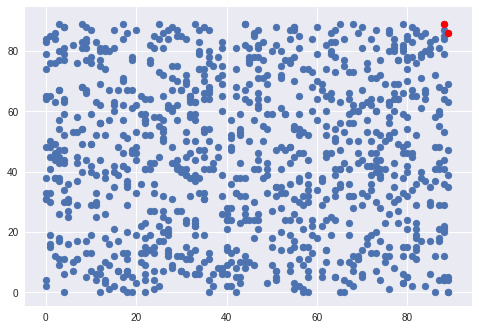

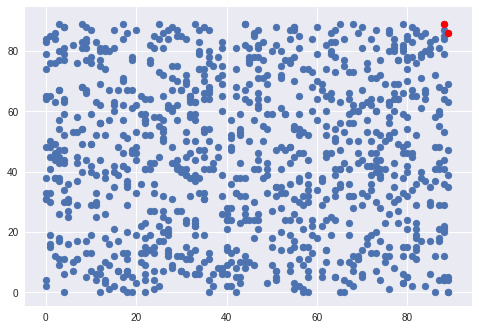

In [27]:
# prueba: datos
N = 500
def puntoSector(r,a):
  ang = math.pi * a / 180
  return (int(r*math.sin(ang)), int(r*math.cos(ang)))

def puntoSectorInv(r,a):
  ang = math.pi * a / 180
  return (N*10 - int(r*math.sin(ang)), N*10 - int(r*math.cos(ang)))

#puntos = [ puntoSectorInv(random.randrange(1, N), random.randrange(0, 90)) for _ in range(N) ]
#puntos = [ puntoSectorInv(random.randrange(N * 9, N * 10), random.randrange(0, 90)) for _ in range(N) ]
#puntos = [ puntoSector(random.randrange(1, N * 10), random.randrange(0, 90)) for _ in range(N) ]
puntos = [(58, 11), (55, 54), (47, 24), (50, 80), (58, 5), (72, 62), (64, 39), (71, 53), (39, 83), (9, 81), (32, 13), (53, 47), (34, 38), (2, 49), (77, 8), (48, 38), (41, 2), (80, 46), (3, 80), (33, 24), (7, 11), (47, 64), (9, 13), (24, 7), (74, 72), (31, 70), (26, 25), (31, 84), (17, 84), (88, 84), (72, 36), (63, 64), (70, 62), (42, 33), (77, 39), (73, 46), (80, 40), (16, 17), (62, 82), (33, 6), (28, 9), (36, 80), (77, 82), (51, 35), (30, 7), (31, 24), (63, 66), (13, 4), (28, 8), (15, 42), (35, 33), (76, 62), (58, 32), (25, 45), (31, 45), (59, 24), (3, 37), (81, 83), (80, 42), (23, 19), (0, 65), (24, 43), (9, 44), (80, 54), (31, 11), (77, 80), (21, 13), (14, 80), (45, 77), (87, 59), (26, 72), (34, 74), (38, 71), (22, 9), (89, 39), (38, 45), (35, 53), (58, 7), (12, 56), (4, 6), (89, 69), (34, 6), (54, 43), (70, 88), (50, 18), (38, 48), (47, 66), (33, 6), (25, 73), (33, 22), (9, 83), (62, 46), (70, 67), (57, 53), (20, 46), (78, 77), (22, 6), (36, 68), (67, 59), (67, 19), (3, 17), (73, 44), (46, 86), (83, 17), (3, 67), (56, 2), (9, 88), (73, 60), (32, 11), (79, 33), (10, 42), (14, 16), (36, 54), (85, 81), (34, 47), (71, 16), (30, 41), (17, 42), (77, 30), (76, 58), (22, 59), (33, 39), (2, 38), (47, 26), (30, 85), (86, 58), (31, 15), (80, 24), (33, 67), (6, 82), (72, 13), (88, 22), (28, 75), (7, 53), (9, 77), (62, 31), (5, 16), (71, 76), (35, 47), (24, 13), (54, 19), (3, 54), (80, 15), (77, 84), (75, 23), (28, 31), (33, 23), (10, 87), (67, 41), (51, 88), (50, 9), (75, 10), (27, 61), (65, 41), (76, 32), (2, 44), (85, 79), (70, 44), (15, 81), (4, 43), (80, 84), (77, 35), (37, 2), (87, 55), (21, 10), (45, 63), (54, 48), (21, 22), (82, 23), (3, 47), (16, 67), (51, 7), (29, 85), (81, 34), (16, 39), (52, 20), (83, 85), (39, 72), (53, 59), (74, 44), (22, 52), (80, 5), (2, 84), (82, 21), (81, 45), (39, 39), (43, 54), (1, 76), (71, 57), (42, 65), (25, 89), (69, 60), (41, 36), (26, 27), (7, 45), (70, 33), (78, 64), (22, 57), (29, 70), (10, 49), (47, 21), (10, 76), (56, 38), (74, 64), (4, 52), (22, 15), (67, 10), (40, 6), (4, 79), (89, 86), (9, 84), (63, 80), (8, 68), (26, 65), (15, 35), (55, 17), (25, 2), (52, 35), (0, 31), (54, 24), (86, 37), (24, 15), (20, 3), (79, 15), (35, 31), (88, 12), (18, 67), (45, 76), (11, 63), (49, 72), (68, 32), (83, 40), (24, 4), (55, 55), (86, 0), (69, 11), (32, 46), (3, 9), (47, 87), (67, 50), (68, 12), (36, 67), (82, 52), (1, 15), (73, 13), (3, 38), (1, 41), (7, 37), (63, 46), (64, 32), (44, 32), (51, 47), (53, 33), (81, 67), (62, 74), (23, 64), (19, 67), (57, 32), (1, 65), (80, 70), (27, 87), (58, 39), (32, 63), (25, 58), (43, 5), (14, 32), (0, 33), (80, 49), (74, 48), (78, 27), (4, 34), (68, 60), (44, 64), (9, 5), (56, 37), (27, 20), (54, 36), (60, 57), (33, 89), (63, 86), (25, 55), (40, 26), (80, 74), (31, 53), (55, 1), (66, 75), (8, 89), (55, 70), (65, 41), (19, 47), (64, 83), (38, 8), (35, 72), (39, 32), (35, 41), (27, 12), (57, 21), (64, 5), (78, 31), (52, 61), (82, 18), (42, 33), (79, 48), (49, 33), (27, 84), (67, 36), (18, 6), (68, 28), (82, 14), (59, 84), (8, 40), (4, 0), (61, 29), (76, 26), (88, 41), (60, 64), (46, 85), (58, 44), (39, 65), (54, 87), (20, 87), (68, 89), (62, 60), (22, 4), (78, 49), (88, 87), (62, 14), (73, 60), (73, 40), (8, 81), (71, 32), (36, 41), (83, 71), (72, 50), (13, 74), (32, 64), (9, 66), (20, 44), (44, 38), (4, 11), (53, 59), (22, 23), (76, 87), (14, 9), (10, 19), (39, 7), (89, 5), (26, 51), (18, 35), (22, 41), (70, 62), (68, 7), (26, 7), (34, 79), (88, 89), (10, 49), (60, 79), (56, 24), (70, 5), (24, 33), (67, 64), (12, 62), (53, 77), (23, 76), (12, 80), (4, 63), (43, 10), (79, 46), (4, 64), (8, 83), (88, 21), (85, 30), (29, 87), (64, 41), (85, 35), (56, 11), (59, 19), (78, 77), (82, 65), (31, 72), (1, 30), (55, 26), (76, 63), (60, 88), (56, 81), (87, 4), (67, 66), (74, 4), (23, 14), (80, 58), (23, 27), (65, 35), (77, 64), (2, 63), (2, 76), (45, 50), (58, 74), (77, 81), (58, 34), (24, 36), (85, 83), (70, 29), (27, 62), (36, 11), (58, 15), (17, 1), (24, 81), (4, 81), (88, 5), (12, 69), (65, 10), (48, 77), (55, 88), (79, 81), (59, 22), (51, 35), (28, 43), (49, 64), (69, 46), (40, 26), (6, 7), (11, 30), (50, 15), (12, 75), (62, 65), (57, 29), (73, 30), (87, 68), (71, 63), (62, 24), (59, 73), (11, 39), (14, 57), (81, 65), (65, 36), (64, 50), (3, 67), (79, 82), (44, 89), (8, 68), (42, 14), (79, 80), (29, 57), (54, 9), (81, 78), (87, 43), (33, 67), (35, 31), (44, 28), (67, 32), (40, 9), (64, 24), (82, 19), (18, 86), (36, 13), (78, 23), (62, 55), (68, 9), (74, 39), (37, 6), (33, 50), (60, 34), (21, 59), (81, 2), (1, 50), (12, 81), (31, 39), (89, 4), (29, 44), (87, 81), (18, 41), (1, 45), (77, 43), (52, 41), (64, 51), (59, 13), (76, 12), (28, 48), (46, 78), (13, 38), (3, 18), (33, 63), (56, 85), (22, 57), (4, 47), (50, 27), (55, 78), (31, 69), (26, 54), (15, 63), (17, 13), (29, 12), (30, 67), (89, 63), (42, 68), (65, 89), (10, 7), (47, 71), (7, 76), (87, 17), (69, 12), (3, 26), (7, 29), (41, 48), (15, 12), (30, 67), (87, 21), (67, 73), (12, 44), (60, 18), (73, 71), (41, 57), (56, 52), (3, 57), (76, 51), (39, 69), (81, 46), (23, 43), (6, 53), (37, 43), (72, 39), (77, 60), (19, 61), (23, 52), (35, 19), (44, 67), (17, 70), (76, 80), (45, 81), (43, 59), (17, 62), (43, 3), (74, 41), (73, 53), (39, 75), (76, 1), (26, 32), (45, 78), (8, 49), (0, 38), (33, 59), (40, 2), (79, 89), (51, 32), (66, 43), (87, 48), (82, 15), (5, 36), (51, 82), (35, 10), (84, 64), (88, 36), (7, 58), (88, 85), (78, 64), (15, 60), (42, 0), (23, 82), (58, 0), (29, 27), (89, 0), (57, 74), (74, 17), (50, 59), (71, 18), (40, 24), (88, 44), (51, 7), (7, 43), (68, 56), (83, 61), (54, 48), (28, 67), (25, 84), (10, 13), (66, 84), (1, 48), (41, 10), (43, 43), (6, 10), (26, 53), (18, 11), (58, 30), (87, 59), (68, 73), (3, 89), (55, 3), (18, 37), (67, 56), (14, 67), (88, 4), (73, 20), (11, 29), (82, 86), (88, 29), (61, 5), (18, 20), (34, 74), (84, 66), (46, 24), (20, 53), (38, 78), (52, 14), (34, 80), (47, 46), (32, 65), (41, 47), (11, 25), (88, 4), (20, 33), (19, 77), (61, 22), (26, 50), (23, 77), (13, 52), (74, 52), (16, 48), (5, 31), (10, 78), (74, 77), (54, 84), (73, 81), (48, 71), (32, 65), (5, 25), (63, 19), (55, 54), (35, 45), (5, 30), (72, 19), (52, 71), (70, 81), (26, 81), (61, 7), (0, 64), (55, 87), (41, 13), (87, 18), (66, 53), (22, 13), (22, 41), (17, 5), (49, 41), (66, 0), (75, 69), (79, 6), (84, 67), (76, 52), (4, 88), (55, 31), (56, 30), (58, 36), (10, 29), (18, 0), (13, 81), (27, 24), (34, 83), (44, 26), (36, 50), (43, 23), (2, 46), (64, 87), (40, 14), (83, 79), (88, 64), (31, 41), (54, 77), (54, 7), (31, 39), (42, 5), (13, 80), (52, 75), (65, 56), (31, 23), (82, 11), (32, 58), (18, 29), (74, 38), (79, 3), (64, 34), (5, 27), (63, 79), (58, 52), (47, 74), (47, 62), (20, 48), (86, 12), (34, 87), (68, 2), (88, 67), (7, 11), (33, 19), (51, 5), (70, 6), (75, 41), (0, 4), (39, 26), (2, 12), (52, 33), (75, 12), (40, 21), (48, 55), (68, 62), (15, 62), (62, 14), (36, 4), (41, 24), (85, 79), (4, 44), (43, 38), (80, 78), (28, 71), (1, 16), (12, 56), (53, 24), (15, 87), (2, 45), (46, 41), (45, 10), (28, 60), (16, 7), (64, 73), (89, 0), (88, 53), (44, 10), (72, 42), (42, 38), (25, 17), (0, 31), (81, 88), (30, 40), (37, 75), (47, 44), (3, 45), (44, 89), (35, 64), (71, 42), (80, 21), (17, 52), (37, 41), (46, 9), (19, 78), (73, 42), (76, 15), (56, 46), (36, 66), (33, 14), (88, 20), (56, 54), (3, 43), (69, 11), (55, 45), (86, 48), (72, 64), (65, 63), (77, 69), (4, 59), (45, 69), (76, 63), (12, 77), (55, 15), (12, 0), (34, 8), (15, 2), (19, 0), (83, 38), (48, 83), (65, 47), (61, 37), (79, 3), (85, 29), (56, 59), (2, 86), (64, 78), (80, 5), (59, 68), (70, 14), (8, 54), (73, 87), (77, 66), (32, 32), (40, 24), (28, 88), (46, 57), (24, 27), (36, 0), (27, 13), (43, 52), (4, 47), (12, 56), (44, 8), (36, 78), (63, 83), (20, 19), (73, 7), (23, 41), (21, 36), (10, 40), (33, 57), (82, 76), (72, 34), (0, 2), (23, 14), (39, 81), (43, 53), (11, 33), (86, 41), (35, 66), (52, 28), (35, 88), (72, 46), (13, 40), (57, 46), (29, 42), (1, 85), (26, 57), (82, 36), (79, 12), (69, 50), (45, 24), (35, 70), (82, 87), (15, 40), (44, 24), (85, 17), (49, 43), (18, 7), (17, 57), (74, 28), (39, 8), (17, 89), (49, 69), (32, 59), (51, 4), (25, 22), (31, 50), (41, 28), (71, 74), (84, 2), (30, 7), (15, 21), (41, 52), (27, 14), (47, 41), (35, 54), (56, 54), (76, 56), (30, 27), (75, 50), (61, 69), (27, 21), (42, 74), (36, 64), (76, 86), (46, 18), (21, 65), (52, 72), (78, 69), (77, 53), (13, 3), (54, 76), (12, 6), (36, 76), (17, 42), (86, 84), (33, 37), (12, 8), (63, 25), (28, 61), (22, 64), (29, 75), (87, 29), (72, 84), (17, 46), (87, 41), (17, 71), (85, 6), (83, 78), (4, 77), (80, 32), (14, 1), (66, 77), (41, 51), (89, 47), (84, 37), (33, 44), (13, 10), (54, 14), (39, 6), (84, 80), (22, 56), (18, 51), (69, 60), (30, 12), (57, 1), (0, 83), (26, 86), (22, 18), (88, 79), (55, 88), (67, 23), (88, 67), (57, 15), (10, 59), (69, 86), (60, 70), (26, 20), (87, 60), (19, 46), (29, 41), (72, 71), (9, 17), (49, 3), (84, 86), (43, 32), (36, 87), (47, 61), (34, 33), (65, 0), (48, 50), (1, 19), (89, 35), (79, 59), (81, 12), (47, 82), (31, 6), (40, 15), (61, 38), (82, 29), (57, 9), (46, 30), (27, 19), (26, 17), (9, 67), (24, 85), (61, 67), (11, 4), (86, 72), (80, 77), (39, 60), (49, 59), (7, 17), (32, 38), (13, 18), (3, 11), (47, 81), (24, 58), (18, 13), (64, 5), (18, 7), (0, 84), (62, 10), (11, 6), (16, 7), (52, 80), (42, 8), (4, 88), (69, 43), (56, 65), (40, 28), (2, 38), (24, 1), (59, 60), (62, 45), (11, 52), (49, 39), (44, 82), (29, 62), (52, 48), (0, 48), (19, 5), (33, 22), (0, 74), (80, 85), (18, 36), (3, 77), (66, 4), (79, 38), (64, 54), (67, 3), (47, 78), (49, 54), (72, 42), (13, 26), (0, 79), (35, 74), (8, 54), (62, 52), (57, 0), (1, 33), (57, 15), (20, 62), (44, 12), (11, 83), (33, 63), (42, 81), (4, 30), (79, 66), (67, 32), (22, 0)]


# prueba
vertices_bruto = FuerzaBruta(puntos)
vertices_divide = Divide(puntos)

# print(puntos)
print (vertices_bruto)
print (vertices_divide)

Pintar(puntos, vertices_bruto)
Pintar(puntos, vertices_divide)